In [2]:
# install the following python packages
# # pip install pandas
# pip install yfinance
# pip install matplotlib
# pip install seaborn
# pip install sklearn
# pip install statsmodels

pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


In [ ]:

import pandas as pd
import yfinance as yf

STOCK_TICKER = 'MSFT' # Example: Microsoft

try:
    ticker_obj = yf.Ticker(STOCK_TICKER)

    # --- Get Financial Statements ---
    income_statement_df = ticker_obj.financials # Annual
    balance_sheet_df = ticker_obj.balance_sheet
    cash_flow_df = ticker_obj.cashflow

    # reverse colums to rows using transpose T
    balance_sheet_df = balance_sheet_df.T
    print(balance_sheet_df.head())
    # Reverse columns to rows using transpose T
    income_statement_df = income_statement_df.T
    print(income_statement_df.head())
    # Reverse columns to rows using transpose T
    cash_flow_df = cash_flow_df.T   
    print(cash_flow_df.head())

    # Save to CSV
    income_statement_df = pd.DataFrame(income_statement_df)
    income_statement_df.to_csv('income_statement_df.csv', index=True)
    # Save to CSV
    balance_sheet_df = pd.DataFrame(balance_sheet_df)
    balance_sheet_df.to_csv('balance_sheet_df.csv', index=True)
    # Save to CSV
    cash_flow_df = pd.DataFrame(cash_flow_df)
    cash_flow_df.to_csv('cash_flow_df.csv', index=True)

    # These are already pandas DataFrames
    print(f"\n--- {STOCK_TICKER} Annual Financial Statements Downloaded and Saved as csv---")
    

    # You can also get quarterly data
    # income_statement_quarterly = ticker_obj.quarterly_financials
    # print(f"\n--- {STOCK_TICKER} Quarterly Income Statement (from yfinance) ---")
    # print(income_statement_quarterly.head())

except Exception as e:
    print(f"An error occurred with yfinance: {e}")

--- MSFT Annual Financial Statements Saved ---
--- MSFT Quarterly Financial Statements Saved ---


## 2. Data Acquisition and Loading from csv

i. The first step is to get your financial statement csv data into a Pandas DataFrame. 
Then display the first 5 rows using .head()

In [4]:

# Upload financial statement from a local CSV file
# income_statement_df = pd.read_csv('income_statement_df.csv')
# balance_sheet_df = pd.read_csv('balance_sheet_df.csv')
# cash_flow_df = pd.read_csv('cash_flow_df.csv')



# Display the first few rows of CSV file uploade to verify
print("\n--- Income Statement Head() ---")
print(income_statement_df.head())
print("\n--- Balance Sheet Head() ---")
print(balance_sheet_df.head())
print("\n--- Cash Flow Head() ---")
print(cash_flow_df.head())


--- Income Statement Head() ---
           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2024-06-30                 -99918000.0              0.182    133558000000.0   
2023-06-30                  -2850000.0               0.19    105155000000.0   
2022-06-30                  43754000.0              0.131     99905000000.0   
2021-06-30            180160797.164637           0.138266     83831000000.0   

           Total Unusual Items Total Unusual Items Excluding Goodwill  \
2024-06-30        -549000000.0                           -549000000.0   
2023-06-30         -15000000.0                            -15000000.0   
2022-06-30         334000000.0                            334000000.0   
2021-06-30        1303000000.0                           1303000000.0   

           Net Income From Continuing Operation Net Minority Interest  \
2024-06-30                                      88136000000.0           
2023-06-30                                      72361000000

## 2. Data Cleaning and Preparation

Financial data can often be messy. We might need to clean it:

##### i. Handle Missing Values 
Part of data cleaning requires us to decide how to treat missing data (e.g., fill with 0, forward-fill, backward-fill, or drop).
there are various ways to deal with NaN, in our case we are going to replace the NaN with the previous number in the column using fillna() method. It fills NaN values by propagating the last known value downward in each column (i.e., filling missing financial data from the previous year or quarter).
NB: to fill missing values column-wise (i.e. top to bottom, across rows), you should set axis=0 and set axis =1 to fill values row-wise

In [5]:
# Fill NaN values
income_statement_df = income_statement_df.ffill(axis=0)
balance_sheet_df = balance_sheet_df.ffill(axis=0)
cash_flow_df = cash_flow_df.ffill(axis=0)

income_statement_df.index = pd.to_datetime(income_statement_df.index)
balance_sheet_df.index = pd.to_datetime(balance_sheet_df.index)
cash_flow_df.index = pd.to_datetime(cash_flow_df.index)

C:\Users\FINANCE\AppData\Local\Temp\ipykernel_11012\1373143021.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  income_statement_df = income_statement_df.ffill(axis=0)
C:\Users\FINANCE\AppData\Local\Temp\ipykernel_11012\1373143021.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  balance_sheet_df = balance_sheet_df.ffill(axis=0)
C:\Users\FINANCE\AppData\Local\Temp\ipykernel_11012\1373143021.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy

#### ii. Standardize Column Names 
We plan column names consistent for easier access usig the strip() and replace() method
strip() : Removes leading and trailing spaces from a string.
replace(' ', '_') : Replaces all spaces in a string with underscores _.
.lower() : makes string lowercase


In [6]:
# Standardize Column Names
income_statement_df.columns = income_statement_df.columns.str.strip().str.replace(' ', '_').str.lower()
balance_sheet_df.columns = balance_sheet_df.columns.str.strip().str.replace(' ', '_').str.lower()
cash_flow_df.columns = cash_flow_df.columns.str.strip().str.replace(' ', '_').str.lower()
# print(income_statement_df.head())
# print(balance_sheet_df.head())
# print(cash_flow_df.head())

### 3. Analysis Techniques
Once your data is clean and structured, we can perform various analyses:

#### i. Ratio Analysis:
Calculate key financial ratios to assess profitability, liquidity, solvency, and efficiency.

##### Profitability Ratios:

Gross Profit Margin: $ \frac{\text{Gross Profit}}{\text{Revenue}} \times 100 $

Net Profit Margin: $ \frac{\text{Net Income}}{\text{Revenue}} \times 100 $

Return on Assets (ROA): $ \frac{\text{Net Income}}{\text{Average Total Assets}} $

Return on Equity (ROE): $ \frac{\text{Net Income}}{\text{Average Shareholder's Equity}} $


In [7]:

# Assuming relevant columns exist in the DataFrames
# Create DataFrame
financial_ratio_df = pd.DataFrame()
# Calculate financial ratios
financial_ratio_df['gross_profit_margin'] = (income_statement_df['gross_profit'] / income_statement_df['total_revenue']) * 100
financial_ratio_df['net_profit_margin'] = (income_statement_df['net_income_continuous_operations'] / income_statement_df['total_revenue']) * 100

# For ROA and ROE, we need data from the balance sheet (assets, equity)
financial_ratio_df['ROA'] = income_statement_df['net_income'] / balance_sheet_df['total_assets']
# print(financial_ratio_df['ROA'])
financial_ratio_df['ROE'] = income_statement_df['net_income'] / balance_sheet_df['total_equity_gross_minority_interest']
# print(financial_ratio_df['ROE'])

##### Liquidity Ratios:
Current Ratio: $ \frac{\text{Current Assets}}{\text{Current Liabilities}} $

In [8]:
financial_ratio_df['current_ratio'] = balance_sheet_df['financial_assets'] / balance_sheet_df['total_liabilities_net_minority_interest']

##### Solvency Ratios:

Debt-to-Equity Ratio: $ \frac{\text{Total Debt}}{\text{Total Shareholder's Equity}} $

Debt-to-Asset Ratio: $ \frac{\text{Total Debt}}{\text{Total Assets}} $

In [9]:
financial_ratio_df['debt_to_equity_ratio'] = balance_sheet_df['long_term_debt_and_capital_lease_obligation'] / balance_sheet_df['total_equity_gross_minority_interest']
balance_sheet_df['debt_to_asset_ratio'] = balance_sheet_df['long_term_debt_and_capital_lease_obligation'] / balance_sheet_df['total_assets']

#### ii. Trend Analysis
Analyze how financial metrics change over time. This usually requires data from multiple periods.


--- Revenue Growth Percentage ---
                 revenue  revenue_growth_pct
2024-06-30  2.451220e+11                 NaN
2023-06-30  2.119150e+11          -13.547132
2022-06-30  1.982700e+11           -6.438902
2021-06-30  1.680880e+11          -15.222676


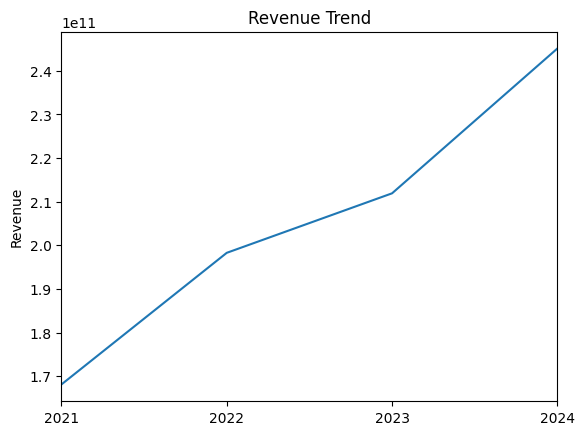

In [10]:
# Our DataFrame is indexed by year or period and has 'revenue'
# Create DataFrame
financial_trend_df = pd.DataFrame()
# Calculate trends
# the'total_revenue' is the column name for revenue in the income statement DataFrame
financial_trend_df['revenue'] = income_statement_df['total_revenue']
# Calculate revenue growth percentage
financial_trend_df['revenue_growth_pct'] = income_statement_df['total_revenue'].pct_change() * 100
# print table of revenue growth percentage
print("\n--- Revenue Growth Percentage ---")
print(financial_trend_df[['revenue', 'revenue_growth_pct']])

# You can then plot trends. this wil be visualised as a line plot
import matplotlib.pyplot as plt
financial_trend_df['revenue'].plot(kind='line', title='Revenue Trend')
plt.ylabel('Revenue')
plt.show()

#### iii. Common-Size Analysis (Vertical Analysis)
In common size analysis we express each line item on a datafram as a percentage or fraction of a base figure.

For the Income Statement, all items are typically expressed as a % of Total Revenue.
For the Balance Sheet, all items are typically expressed as a % of Total Assets.

In [11]:
# Common-size Income Statement
#create a copy of the income statement DataFrame
common_size_income_statement = income_statement_df.copy()
base_revenue = common_size_income_statement['total_revenue']
# Iterate through the columns and convert to common size
# Assuming 'total_revenue' is the base for common-size calculations
for column in common_size_income_statement.columns:
    if common_size_income_statement[column].dtype == 'float64' or common_size_income_statement[column].dtype == 'int64':
        common_size_income_statement[column] = (common_size_income_statement[column] / base_revenue) * 100
print(common_size_income_statement.head())

# Common-size Balance Sheet is found using a simmilar approach
# Create a copy of the balance sheet DataFrame
common_size_balance_sheet = balance_sheet_df.copy()
base_assets = common_size_balance_sheet['total_assets']
for column in common_size_balance_sheet.columns:
    if common_size_balance_sheet[column].dtype == 'float64' or common_size_balance_sheet[column].dtype == 'int64':
         common_size_balance_sheet[column] = (common_size_balance_sheet[column] / base_assets) * 100
print(common_size_balance_sheet.head())

            tax_effect_of_unusual_items  tax_rate_for_calcs  \
2024-06-30                    -0.040763        7.424874e-11   
2023-06-30                    -0.001345        8.965859e-11   
2022-06-30                     0.022068        6.607152e-11   
2021-06-30                     0.107182        8.225810e-11   

            normalized_ebitda  total_unusual_items  \
2024-06-30          54.486337            -0.223970   
2023-06-30          49.621310            -0.007078   
2022-06-30          50.388359             0.168457   
2021-06-30          49.873281             0.775189   

            total_unusual_items_excluding_goodwill  \
2024-06-30                               -0.223970   
2023-06-30                               -0.007078   
2022-06-30                                0.168457   
2021-06-30                                0.775189   

            net_income_from_continuing_operation_net_minority_interest  \
2024-06-30                                          35.955973       

#### iv. Horizontal Analysis:
Compare line items across different periods, showing the absolute and percentage change.

In [12]:
# Assuming data for multiple periods (e.g., '2023', '2024' as columns or rows)
# For simplicity, let's assume you have a DataFrame 'fs_data' with years as columns
# and line items as index.
# create a copy of the income statement DataFrame
# and transpose it to have years as columns
fs_data = income_statement_df.copy().T
income_statement_horizontal_df = pd.DataFrame()
# Calculate the change in absolute and percentage terms
# Add data for 2023 and 2024
income_statement_horizontal_df['change_absolute'] = fs_data['2024-06-30'] - fs_data['2023-06-30']
income_statement_horizontal_df['change_percentage'] = ((fs_data['2024-06-30'] - fs_data['2023-06-30']) / fs_data['2023-06-30']) * 100
print(income_statement_horizontal_df[['change_absolute', 'change_percentage']])

                                                    change_absolute  \
tax_effect_of_unusual_items                           -9.706800e+07   
tax_rate_for_calcs                                    -8.000000e-03   
normalized_ebitda                                      2.840300e+10   
total_unusual_items                                   -5.340000e+08   
total_unusual_items_excluding_goodwill                -5.340000e+08   
net_income_from_continuing_operation_net_minori...     1.577500e+10   
reconciled_depreciation                                8.426000e+09   
reconciled_cost_of_revenue                             8.251000e+09   
ebitda                                                 2.786900e+10   
ebit                                                   1.944300e+10   
net_interest_income                                   -8.040000e+08   
interest_expense                                       9.670000e+08   
interest_income                                        1.630000e+08   
normal

### 4. Visualization

Pandas integrates well with visualization libraries like Matplotlib and Seaborn to create charts and graphs, which are essential for understanding trends and relationships.

#### i. Plots a bar chart.

#### instruction on how to plot a char

kind='bar': Specifies a vertical bar chart.

figsize=(12, 7): Sets the size of the chart to 12 units wide and 7 units tall.
plt.title('Gross & Net Profit Margin Over Time'): Adds a title to the chart

Sets labels for the x-axis and y-axis.

'Fiscal Year': Assumes the index of margins_df represents fiscal years.

'Ratio Value (%)': Indicates that the values on the y-axis are percentages.

plt.xticks(rotation=45): Rotates the x-axis labels (fiscal years) by 45 degrees for better readability.

plt.legend(title='Ratios'): Adds a legend to the chart, with the title 'Ratios'.

set_xticklabels() is used to manually set the x-axis labels.

d.strftime('%Y') ensures only the year (e.g., "2021", "2022") is shown.

Rotation is set to 0 for clean, horizontal labels (you can change this if needed).




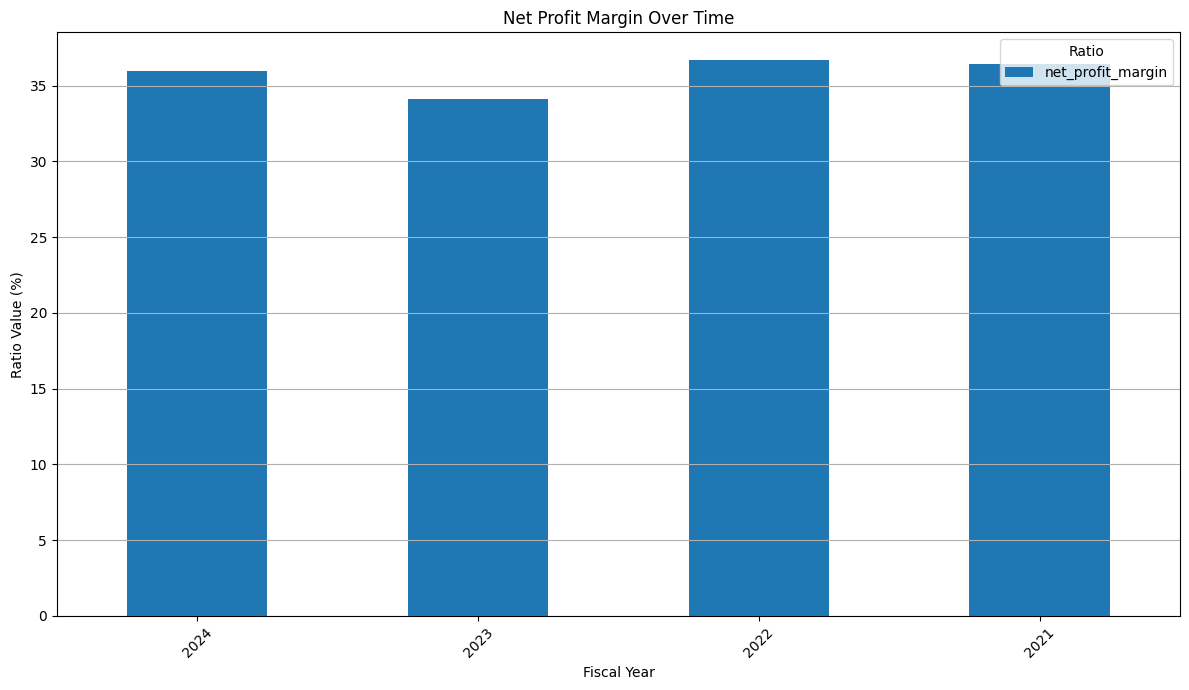

In [ ]:
import matplotlib.pyplot as plt

# Select only the net profit margin
margins_df = financial_ratio_df[['net_profit_margin']]

# Plot the selected ratio
ax = margins_df.plot(kind='bar', figsize=(12, 5))

# Format the x-axis labels to show only the year
ax.set_xticklabels([d.strftime('%Y') for d in margins_df.index])
plt.title('Net Profit Margin Over Time')  # title
plt.xlabel('Fiscal Year')
plt.ylabel('Ratio Value (%)')
plt.xticks(rotation=45)
plt.legend(title='Ratio')  
plt.grid(axis='y')
plt.tight_layout()
plt.show()




#### ii. Two or more Plots in a single bar chart

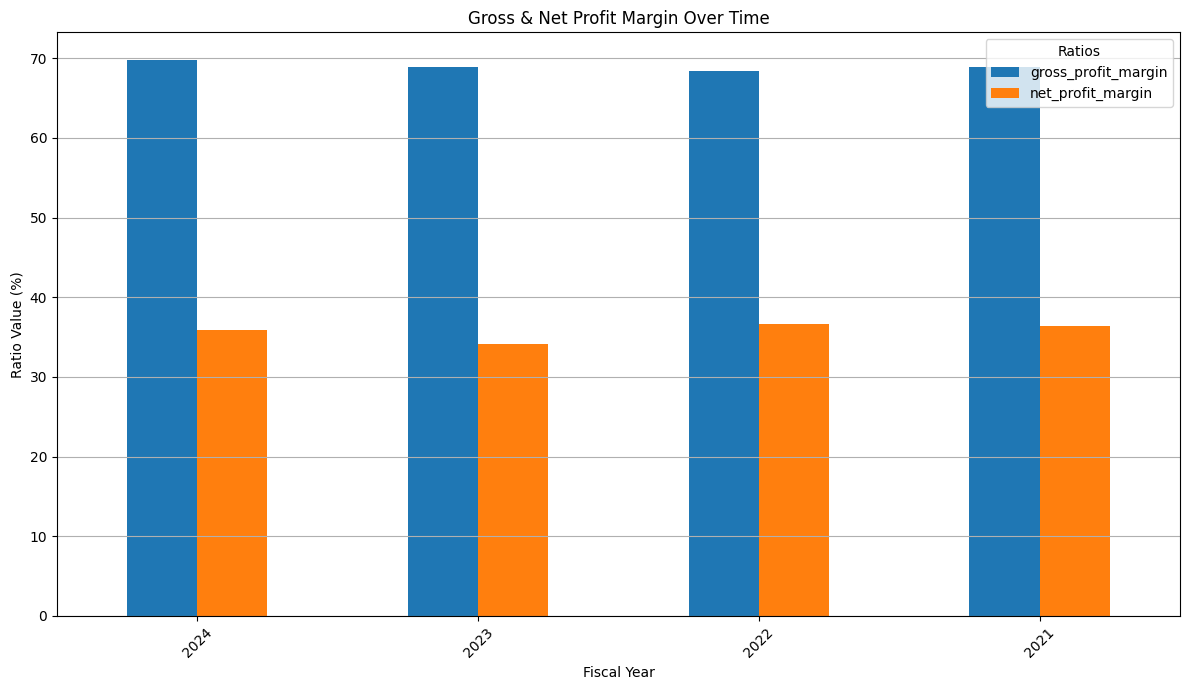

In [ ]:
import matplotlib.pyplot as plt

# Select both gross and net profit margins
margins_df = financial_ratio_df[['gross_profit_margin', 'net_profit_margin']]

# Plot both ratios
# Plot the selected ratio
chart_plot = margins_df.plot(kind='bar', figsize=(12, 5))
# Format the x-axis labels to show only the year
chart_plot.set_xticklabels([d.strftime('%Y') for d in margins_df.index])
plt.title('Gross & Net Profit Margin Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Ratio Value (%)')
plt.xticks(rotation=45)
plt.legend(title='Ratios')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### iii Line Char
To plot a line chart we follow the same steps as the ones use for the bar chart

To the .plot method, alter kind = 'line' and  add marker = 'o' to add markers. You can use the * or any marker of choice


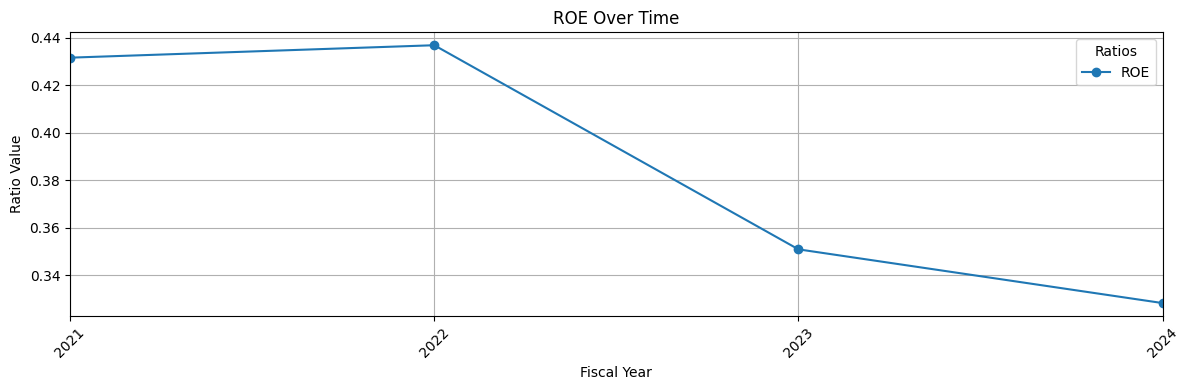

In [15]:
financial_ratio_df['ROE'].T.plot(kind='line', marker='o', figsize=(12, 4))
plt.title('ROE Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Ratio Value')
plt.grid(True)
plt.legend(title='Ratios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### iv. Multiple plots for Multiple years in 1 chart 
To compare multiple financial ratios across different fiscal years by plotting them as a bar chart. The chart is generated by transposing the original DataFrame so that each year becomes a group of bars, and each bar represents a specific financial ratio.

data.index.strftime('%Y') converts the datetime index to just the year for labeling.

The labels= parameter in .plot() ensures your pie chart slices are labeled by year.



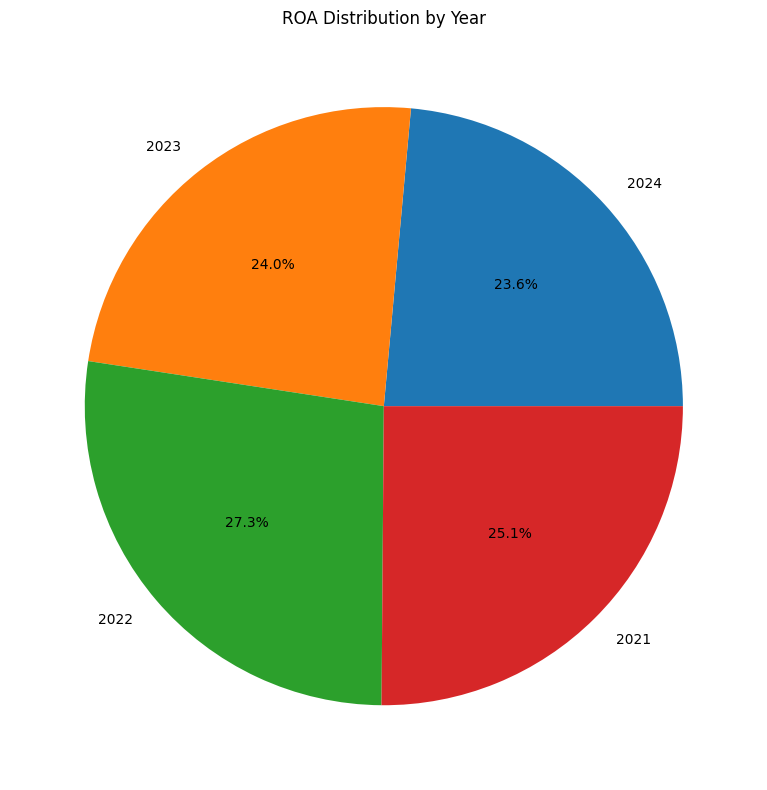

In [16]:


# Extract the data and labels
data = financial_ratio_df['ROA']
labels = data.index.strftime('%Y')  # Extract just the year from the datetime index

# Plot the pie chart
chart_plot = data.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', labels=labels)

# Add title and clean formatting
plt.title('ROA Distribution by Year')
plt.ylabel('')  # Hide y-label for pie chart
plt.tight_layout()
plt.show()



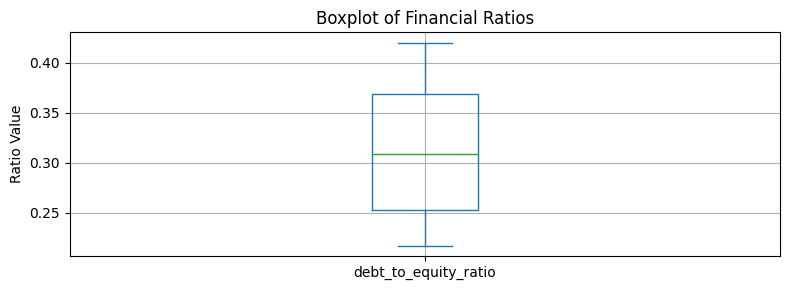

In [17]:
financial_ratio_df['debt_to_equity_ratio'].plot(kind='box', figsize=(8,3))
plt.title('Boxplot of Financial Ratios')
plt.ylabel('Ratio Value')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# pip install scikit-learn

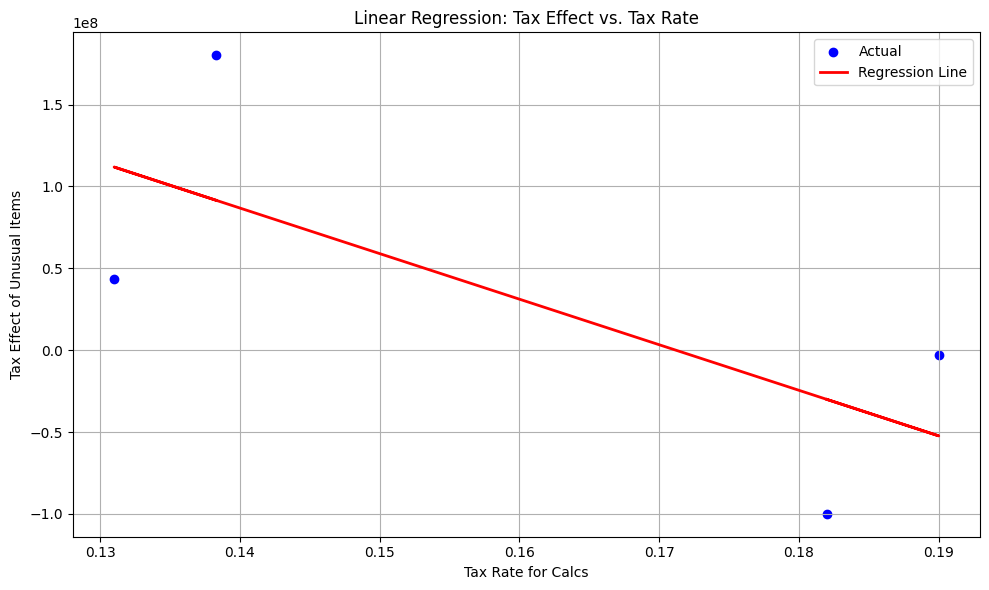

Coefficient (slope): -2,783,320,049.42
Intercept: 476,498,827.99
R² Score: 0.5134


In [ ]:
# print(income_statement_df)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare feature (X) and target (y)
X = income_statement_df[['tax_rate_for_calcs']]  # 2D array for sklearn
y = income_statement_df['tax_effect_of_unusual_items']  # 1D array

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Tax Effect vs. Tax Rate')
plt.xlabel('Tax Rate for Calcs')
plt.ylabel('Tax Effect of Unusual Items')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print regression details
print(f"Coefficient (slope): {model.coef_[0]:,.2f}")
print(f"Intercept: {model.intercept_:,.2f}")
print(f"R² Score: {model.score(X, y):.4f}")


What it actually does:
Plots a line chart using seaborn (sns.lineplot).

X-axis: the DataFrame's index (likely dates or years).

Y-axis: 'normalized_ebitda' column.

Title: says "Net Profit Margin Over Time", but you're plotting EBITDA, not net profit margin.



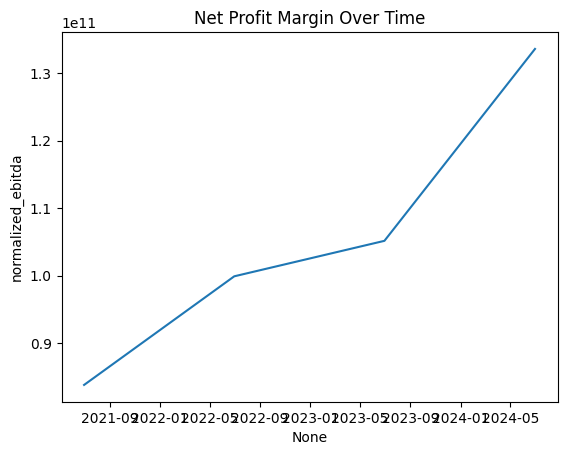

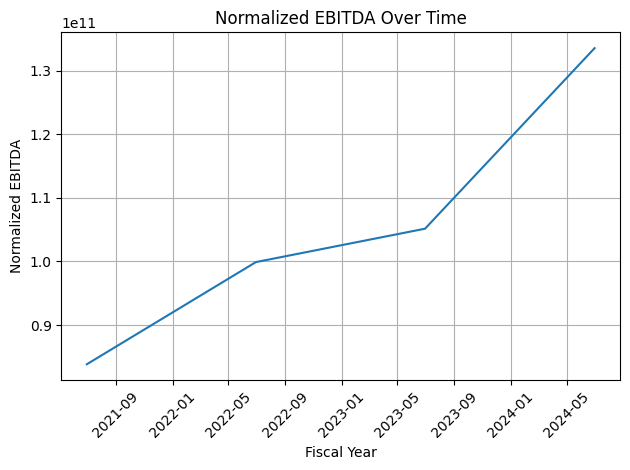

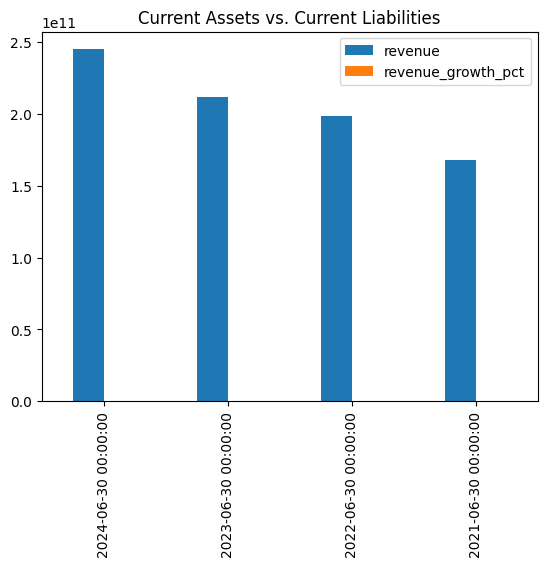

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting Net Profit Margin over time
# Assuming 'year' and 'net_profit_margin' columns exist

sns.lineplot(data=income_statement_df, x=income_statement_df.index, y='normalized_ebitda')
plt.title('Normalized EBITDA Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Normalized EBITDA')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Example: Bar chart for current assets and current liabilities
financial_trend_df[['revenue', 'revenue_growth_pct']].plot(kind='bar')
plt.title('Current Assets vs. Current Liabilities')
plt.show()

## Linear Regression Model:

net_profit_margin was set as the dependent variable (Y).

The other calculated ratios (gross_profit_margin, operating_profit_margin, current_ratio, debt_to_equity_ratio, operating_cash_flow_margin) were chosen as independent variables (X).

We used statsmodels.api.OLS (Ordinary Least Squares), a common method for linear regression, to fit the model.

A 'constant' term was added to the X variables. This allows the model to have an intercept, representing the net_profit_margin when all independent variables are zero.

In [31]:
import pandas as pd
import yfinance as yf

STOCK_TICKER = 'MSFT'  # Example: Microsoft

try:
    ticker_obj = yf.Ticker(STOCK_TICKER)

    # Get Annual Financial Statements
    income_annual = ticker_obj.financials.T
    balance_annual = ticker_obj.balance_sheet.T
    cashflow_annual = ticker_obj.cashflow.T

    # Get Quarterly Financial Statements
    income_quarterly = ticker_obj.quarterly_financials.T
    balance_quarterly = ticker_obj.quarterly_balance_sheet.T
    cashflow_quarterly = ticker_obj.quarterly_cashflow.T

    # Add a frequency column for traceability (optional)
    income_annual['frequency'] = 'annual'
    income_quarterly['frequency'] = 'quarterly'
    balance_annual['frequency'] = 'annual'
    balance_quarterly['frequency'] = 'quarterly'
    cashflow_annual['frequency'] = 'annual'
    cashflow_quarterly['frequency'] = 'quarterly'

    # Combine Annual and Quarterly
    income_combined = pd.concat([income_annual, income_quarterly])
    balance_combined = pd.concat([balance_annual, balance_quarterly])
    cashflow_combined = pd.concat([cashflow_annual, cashflow_quarterly])
    # Drop duplicate periods (keep annual if duplicate)
    income_combined = income_combined[~income_combined.index.duplicated(keep='first')]
    balance_combined = balance_combined[~balance_combined.index.duplicated(keep='first')]
    cashflow_combined = cashflow_combined[~cashflow_combined.index.duplicated(keep='first')]

    # Sort by date
    income_combined = income_combined.sort_index()
    balance_combined = balance_combined.sort_index()
    cashflow_combined = cashflow_combined.sort_index()

    # Save to CSV if needed
    income_combined.to_csv('combined_income_statement.csv')
    balance_combined.to_csv('combined_balance_sheet.csv')
    cashflow_combined.to_csv('combined_cash_flow.csv')

    print(f"✔ Combined and saved {STOCK_TICKER} financials: annual + quarterly.")

except Exception as e:
    print(f"An error occurred: {e}")


✔ Combined and saved MSFT financials: annual + quarterly.


In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load your combined dataset
df = pd.read_csv('combined_income_statement.csv', parse_dates=True, index_col=0)

# Drop the 'frequency' column if present
df = df.drop(columns=['frequency'], errors='ignore')

# Drop rows with any missing values
df_clean = df.dropna()

# Set your target variable
target_column = 'Net Income'

# Select features (can be customized)
features = [
    'Normalized EBITDA', 'EBITDA', 'EBIT', 'Operating Income',
    'Net Income Including Noncontrolling Interests', 'Total Revenue',
    'Operating Expense', 'Tax Provision', 'Pretax Income'
]

# Filter to only those columns
X = df_clean[features]
y = df_clean[target_column]


In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Show coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coef_df)


R² Score: 0.9998870171920162
MSE: 6.527076249005123e+16

Feature Coefficients:
                                         Feature  Coefficient
0                              Normalized EBITDA     0.003671
1                                         EBITDA     0.176013
2                                           EBIT     0.112361
3                               Operating Income    -0.057197
4  Net Income Including Noncontrolling Interests     0.481928
5                                  Total Revenue     0.075746
6                              Operating Expense     0.024981
7                                  Tax Provision    -0.441331
8                                  Pretax Income     0.040597


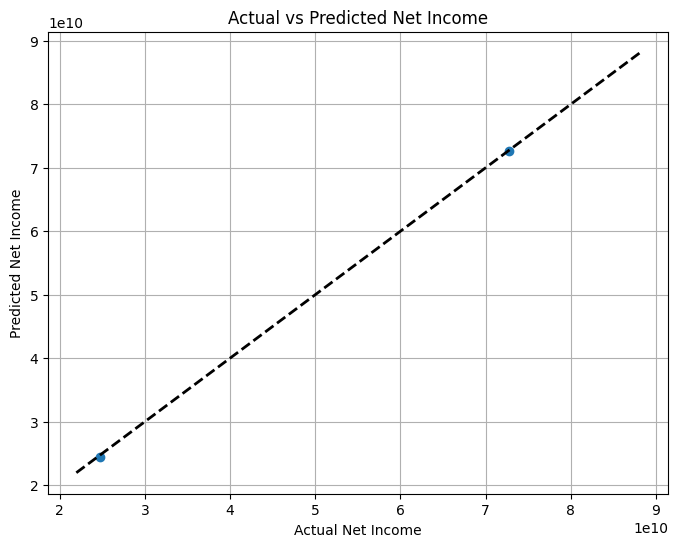

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Net Income')
plt.ylabel('Predicted Net Income')
plt.title('Actual vs Predicted Net Income')
plt.grid(True)
plt.show()


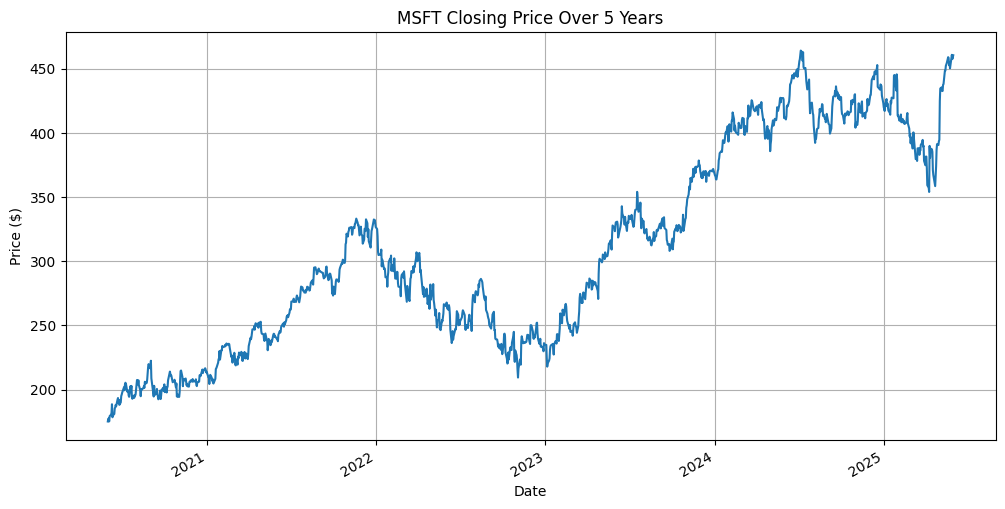

In [37]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = yf.Ticker("MSFT")
hist = ticker.history(period="5y", interval="1d")  # or interval="1wk"

# Simple plot: Closing price over time
hist['Close'].plot(title="MSFT Closing Price Over 5 Years", figsize=(12, 6))
plt.ylabel("Price ($)")
plt.grid()
plt.show()


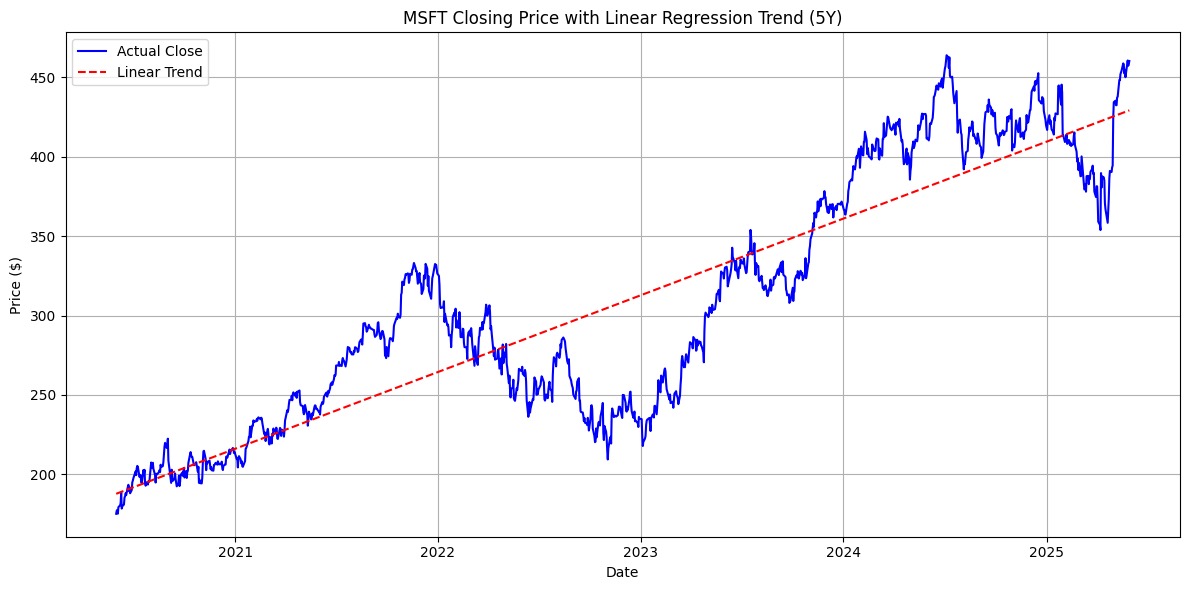

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regression
# Convert dates to ordinal (number format)
hist['DateOrdinal'] = hist.index.map(lambda x: x.toordinal())
X = hist['DateOrdinal'].values.reshape(-1, 1)
y = hist['Close'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the regression model
y_pred = model.predict(X)

# Plot actual closing prices and regression line
plt.figure(figsize=(12, 6))
plt.plot(hist.index, y, label="Actual Close", color="blue")
plt.plot(hist.index, y_pred, label="Linear Trend", color="red", linestyle="--")
plt.title("MSFT Closing Price with Linear Regression Trend (5Y)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


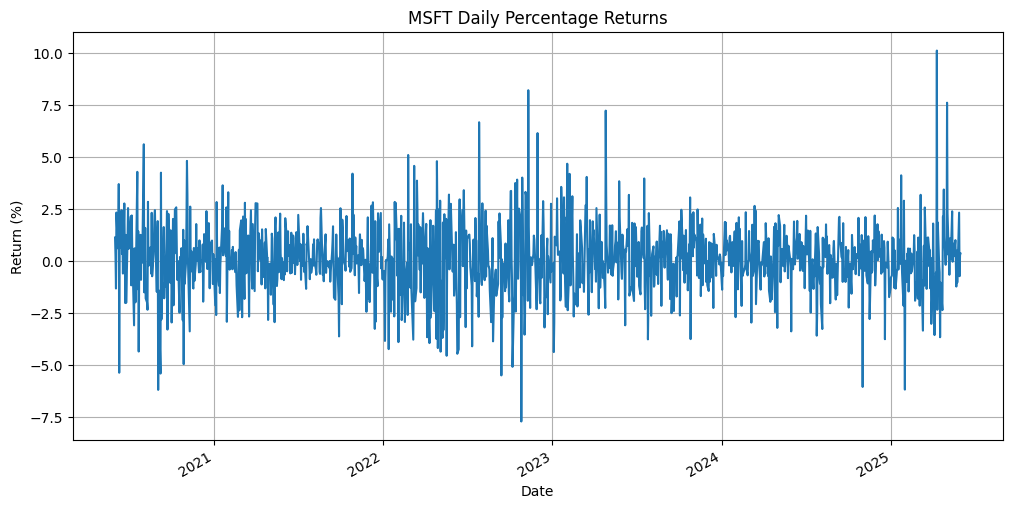

In [41]:
import yfinance as yf
import matplotlib.pyplot as plt



# Calculate simple daily returns
hist['Daily % Return'] = hist['Close'].pct_change() * 100

# Plot
plt.figure(figsize=(12, 6))
hist['Daily % Return'].plot(title="MSFT Daily Percentage Returns")
plt.ylabel("Return (%)")
plt.grid()
plt.show()


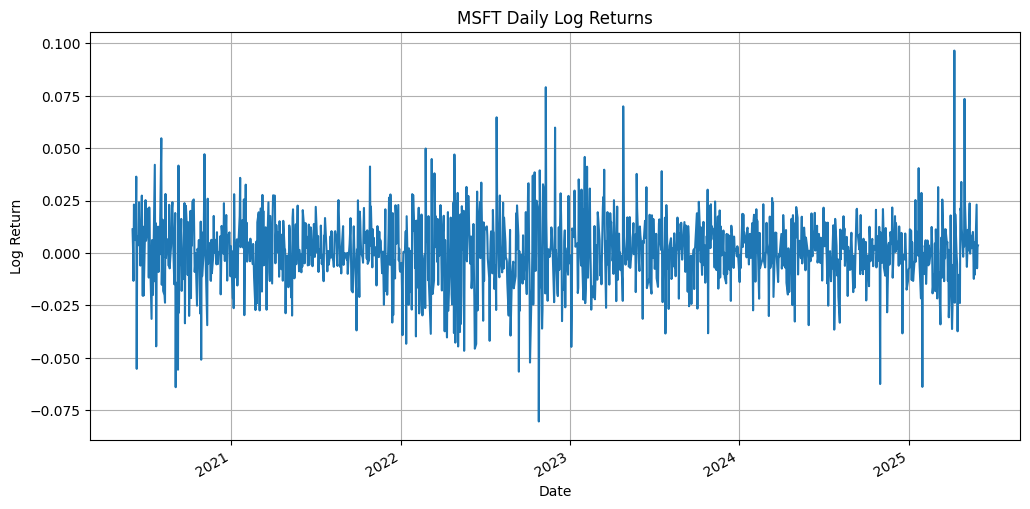

In [43]:
import numpy as np

# Calculate log returns
hist['Log Return'] = np.log(hist['Close'] / hist['Close'].shift(1))

# Plot
plt.figure(figsize=(12, 6))
hist['Log Return'].plot(title="MSFT Daily Log Returns")
plt.ylabel("Log Return")
plt.grid()
plt.show()


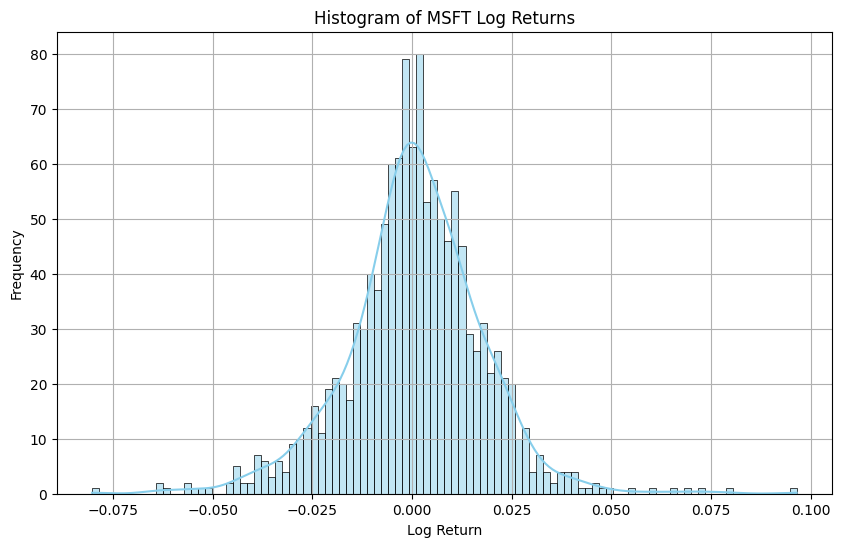

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(hist['Log Return'].dropna(), bins=100, kde=True, color='skyblue')
plt.title("Histogram of MSFT Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [46]:
from scipy.stats import normaltest

stat, p = normaltest(hist['Log Return'].dropna())
print(f"Normality test p-value: {p:.4f}")
if p < 0.05:
    print("Log returns are likely not normally distributed.")
else:
    print("Log returns may be normally distributed.")


Normality test p-value: 0.0000
Log returns are likely not normally distributed.


## CAPM Regression (Measure Beta and Alpha)

The **Capital Asset Pricing Model (CAPM)** estimates a stock's expected return based on its sensitivity to market movements. The model is given by:

$ R_i - R_f = \alpha + \beta(R_m - R_f) + \epsilon $

Where:

- $ R_i $ : Return of the individual asset (e.g., MSFT)
- $R_f $ : Risk-free rate (e.g., 3-month Treasury bill rate)
- $R_m $ : Return of the market portfolio (e.g., S&P 500 via ^GSPC)
- $\alpha $ : Stock-specific return unexplained by the market (alpha)
- $\beta $ : Sensitivity of the asset to the market (beta)
- $\epsilon $ : Random error term (residual)

### Interpretation:
- **Alpha (α)**: Represents the stock's performance relative to the expected return. A positive alpha ($\alpha > 0 $) indicates outperformance.
- **Beta (β)**: Measures market risk (volatility).  
  - $\beta = 1 $ : Moves with the market  
  - $\beta > 1$ : More volatile than the market  
  - $\beta < 1$ : Less volatile than the market

The goal is to estimate $\alpha $  and $\beta $  using historical return data.


In [50]:
import yfinance as yf
import statsmodels.api as sm

# Get market index data (e.g., S&P 500)
risk_free_rate = 0.05  # 5% annual risk-free rate

market = yf.Ticker("^GSPC")
market_hist = market.history(period="5y", interval="1d")
market_hist['Log Return'] = np.log(market_hist['Close'] / market_hist['Close'].shift(1))

# Align dates
combined = hist[['Log Return']].join(market_hist['Log Return'], lsuffix='_msft', rsuffix='_market')
combined.dropna(inplace=True)

# Excess returns (over daily risk-free rate)
daily_rf = (1 + risk_free_rate)**(1/252) - 1
combined['excess_msft'] = combined['Log Return_msft'] - daily_rf
combined['excess_market'] = combined['Log Return_market'] - daily_rf

# CAPM regression
X = sm.add_constant(combined['excess_market'])
y = combined['excess_msft']
capm_model = sm.OLS(y, X).fit()

print(capm_model.summary())


                            OLS Regression Results                            
Dep. Variable:            excess_msft   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1855.
Date:                Sun, 01 Jun 2025   Prob (F-statistic):          1.82e-249
Time:                        00:41:53   Log-Likelihood:                 3899.7
No. Observations:                1256   AIC:                            -7795.
Df Residuals:                    1254   BIC:                            -7785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.604

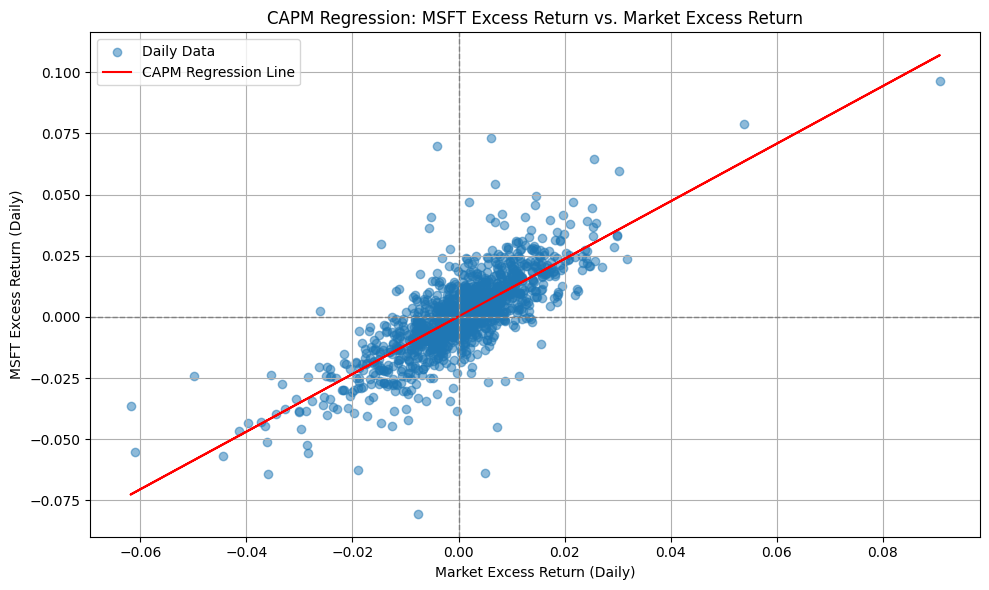

In [51]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(combined['excess_market'], combined['excess_msft'], alpha=0.5, label='Daily Data')
plt.plot(combined['excess_market'], capm_model.predict(X), color='red', label='CAPM Regression Line')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

plt.title("CAPM Regression: MSFT Excess Return vs. Market Excess Return")
plt.xlabel("Market Excess Return (Daily)")
plt.ylabel("MSFT Excess Return (Daily)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
